# MNIST Dataset Classification using an Artificial Neural Network

<h4>In this Project we Will be actully Followed the Follwing Steps</h4>
<P>================================================================================================</P>

<B>
<ol>
  <li>Importing the libries</li>
  <li>Loading the DataSet</li>
  <li>Collecting Basic Information About The DataSet</li>
  <li>Spliting the DataSet</li>
  <li>Preprocesing The Data</li>
  <li>Build the Model</li>
  <li>Compile the Model</li>
  <li>Train the Model</li>
  <li>Evaluate the Model</li>
  <li>Make Predictions</li>
</ol>
 </B>


# Importing the libries

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Importing necessary modules from tensorflow.keras
from tensorflow.keras.datasets import mnist  # Corrected the typo in the dataset name
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Loading and Spliting the DataSet

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


# Collecting Basic Information About The DataSet

In [3]:
# Check the shapes of the training and test datasets
print("x_train shape:", x_train.shape)  # (60000, 28, 28)
print("y_train shape:", y_train.shape)  # (60000,)
print("x_test shape:", x_test.shape)    # (10000, 28, 28)
print("y_test shape:", y_test.shape)    # (10000,)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


#### Display a single picture from the DataSet

In [4]:
x_train[0].shape

(28, 28)

In [8]:

# Assuming x_train is a NumPy array
First_image = pd.DataFrame(x_train[0])
First_image

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


# Display the Overall DataSet

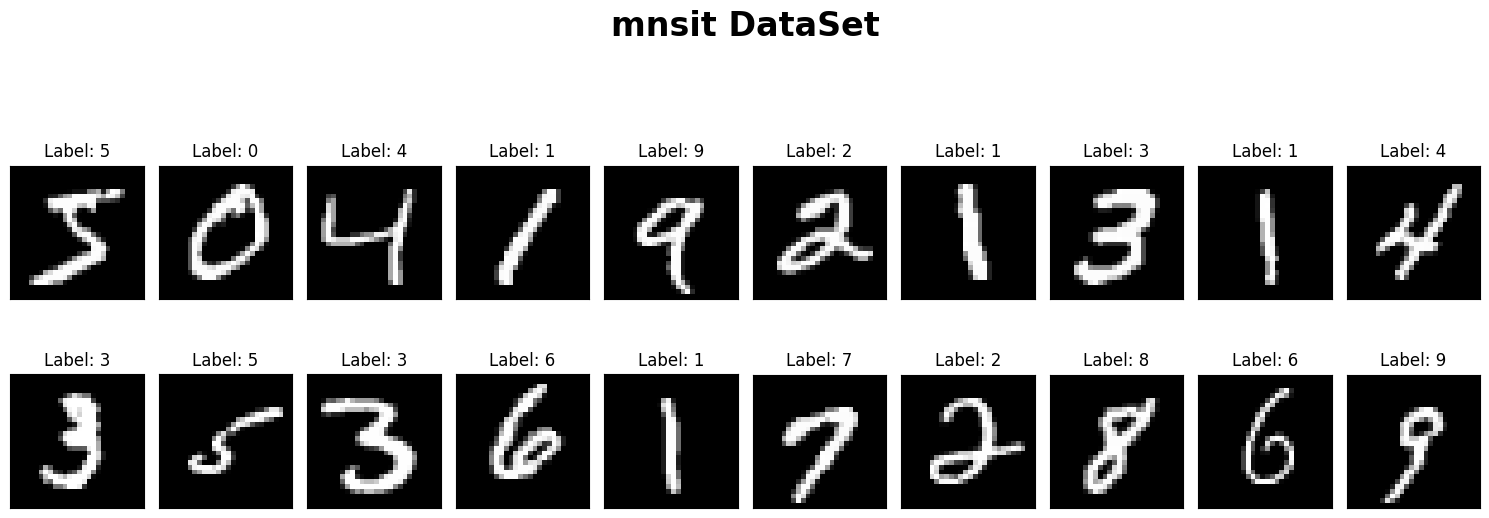

In [9]:

# Number of digits to display
n = 20

# Create a figure to display the images
fig = plt.figure(figsize=(15, 6))

# Add an H1-style heading
fig.suptitle('mnsit DataSet', fontsize=24, fontweight='bold')

# Loop through the first 'n' images
for i in range(n):
    # Create a subplot within the figure
    ax = plt.subplot(2, n//2, i+1)

    # Display the original image
    plt.imshow(x_train[i], cmap='gray')

    # Set the title to the corresponding label
    plt.title(f"Label: {y_train[i]}")

    # Hide x-axis and y-axis labels and ticks
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the suptitle

# Show the figure with the images
plt.show()

# Close the figure
plt.close()


# Preprocesing The Data

#### Reshape the Dataset

In [10]:
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)

In [11]:
# Check the shapes of the training and test datasets
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)


x_train shape: (60000, 784)
x_test shape: (10000, 784)


#### Display Training Data

In [12]:
traing_input_data=pd.DataFrame(x_train)
traing_input_data

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### changing their Datatypes

In [13]:
x_train=x_train.astype("float")
x_test=x_test.astype("float")

# Now Scaled the Data

In [14]:
x_train /=255
x_test /=255

In [15]:
traing_input_data=pd.DataFrame(x_train)
traing_input_data

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Now Preprocessing the Traget columns

In [16]:
y_train.shape

(60000,)

In [17]:
traget_columns=pd.DataFrame(y_train)
traget_columns

,0
0,5
1,0
2,4
3,1
4,9
...,...
59995,8
59996,3
59997,5
59998,6


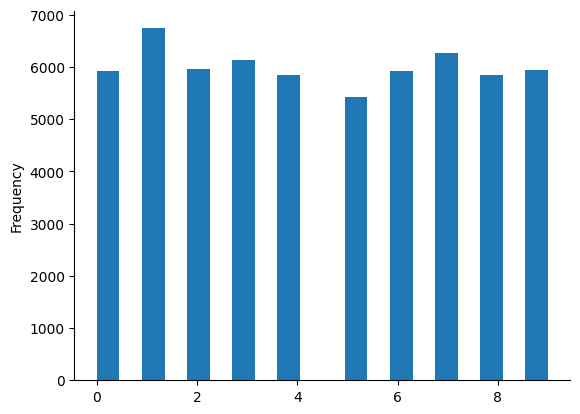

In [18]:
# @title 0

from matplotlib import pyplot as plt
traget_columns[0].plot(kind='hist', bins=20, title=0)
plt.gca().spines[['top', 'right',]].set_visible(False)

##### How much unique Class are Present in this Traget columns

In [19]:
traget_columns[0].unique()

array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8], dtype=uint8)

In [20]:
Total_number_of_class=len(traget_columns[0].unique())
Total_number_of_class

10

### applay onehot encoding on that target columns

In [21]:
y_train=to_categorical(y_train,Total_number_of_class)
y_test=to_categorical(y_test,Total_number_of_class)

# Check the shapes of the training and test datasets
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


y_train shape: (60000, 10)
y_test shape: (10000, 10)


### Here How the the target columns are look like

In [22]:
traget_columns_Scaled=pd.DataFrame(y_train)
traget_columns_Scaled.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [23]:
traget_columns_Scaled_testing=pd.DataFrame(y_test )
traget_columns_Scaled_testing.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Input to The Model

In [24]:
# Print the shapes of the preprocessed training data and labels
print("New X_train shape: {} \nNew Y_train shape:{}".format(x_test.shape, y_train.shape))

New X_train shape: (10000, 784) 
New Y_train shape:(60000, 10)


# Full Data info

In [25]:

print("-----------------------------------------------------")
print("Training data")
print("-----------------------------------------------------")
# Check the shapes of the training and test datasets
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)


print("-----------------------------------------------------")
print("Testing data")
print("-----------------------------------------------------")

print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)



-----------------------------------------------------
Training data
-----------------------------------------------------
x_train shape: (60000, 784)
y_train shape: (60000, 10)
-----------------------------------------------------
Testing data
-----------------------------------------------------
x_test shape: (10000, 784)
y_test shape: (10000, 10)


## **Setting up Hyper-parameters**

In [26]:
# Define the input size for each data sample (e.g., image pixels)
input_size = 784

# Specify the number of data samples to process in each batch
batch_size = 200

# Define the number of neurons in the first hidden layer
hidden1 = 400

# Define the number of neurons in the second hidden layer
hidden2 = 20

# Define the total number of classes/categories in the dataset
classes = 10

# Set the number of complete passes through the dataset during training
epochs = 30


## **Building the FCN Model**

In [27]:
### 4. Build the model ###

# Create a Sequential model, which allows us to build a neural network layer by layer
model = Sequential()

# Add the first hidden layer with 'hidden1' neurons, using ReLU activation function
# The 'input_dim' specifies the input size for this layer
model.add(Dense(hidden1, input_dim=input_size, activation='relu'))
# output = relu(dot(W, input) + bias)

# Add the second hidden layer with 'hidden2' neurons, also using ReLU activation function
model.add(Dense(hidden2, activation='relu'))


# Add the output layer with 'classes' neurons, using softmax activation function
# Softmax activation ensures that the output values represent probabilities of each class
model.add(Dense(classes, activation='softmax'))

### Compilation ###

# Compile the model by specifying the loss function, optimizer, and evaluation metrics
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'], optimizer='sgd')

# Display a summary of the model architecture, showing the layers and parameter counts
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 400)               314000    
                                                                 
 dense_1 (Dense)             (None, 20)                8020      
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
Total params: 322230 (1.23 MB)
Trainable params: 322230 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## **Training The Model**

In [28]:
# Import necessary libraries
from time import time

# Record the current time to measure training time
tic = time()

# Fit the model on the training data
History=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1)

# Record the time after model training
toc = time()

# Calculate and print the time taken for model training
print("Model training took {} secs".format(toc - tic))

# Testing the trained model
### 5. Test
# You can continue your code from here...


Epoch 1/30
300/300 [==============================] - 2s 3ms/step - loss: 1.7080 - accuracy: 0.4953
Epoch 2/30
300/300 [==============================] - 1s 3ms/step - loss: 0.7415 - accuracy: 0.8204
Epoch 3/30
300/300 [==============================] - 1s 3ms/step - loss: 0.5149 - accuracy: 0.8652
Epoch 4/30
300/300 [==============================] - 1s 3ms/step - loss: 0.4295 - accuracy: 0.8837
Epoch 5/30
300/300 [==============================] - 1s 3ms/step - loss: 0.3821 - accuracy: 0.8952
Epoch 6/30
300/300 [==============================] - 1s 3ms/step - loss: 0.3503 - accuracy: 0.9022
Epoch 7/30
300/300 [==============================] - 1s 3ms/step - loss: 0.3269 - accuracy: 0.9086
Epoch 8/30
300/300 [==============================] - 1s 4ms/step - loss: 0.3085 - accuracy: 0.9134
Epoch 9/30
300/300 [==============================] - 1s 4ms/step - loss: 0.2931 - accuracy: 0.9178
Epoch 10/30
300/300 [==============================] - 1s 4ms/step - loss: 0.2800 - accuracy: 0.9212

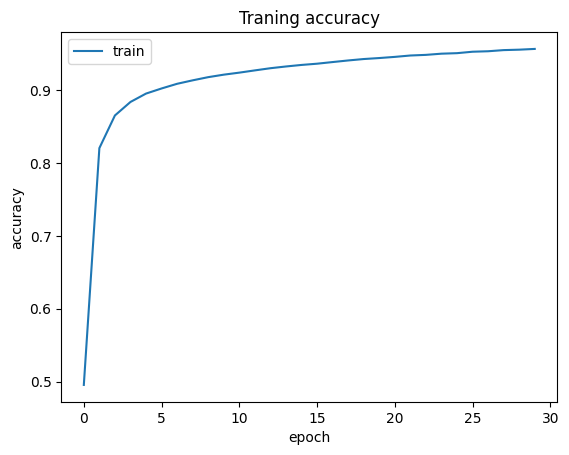

In [33]:
plt.plot(History.history['accuracy'])
plt.title('Traning accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

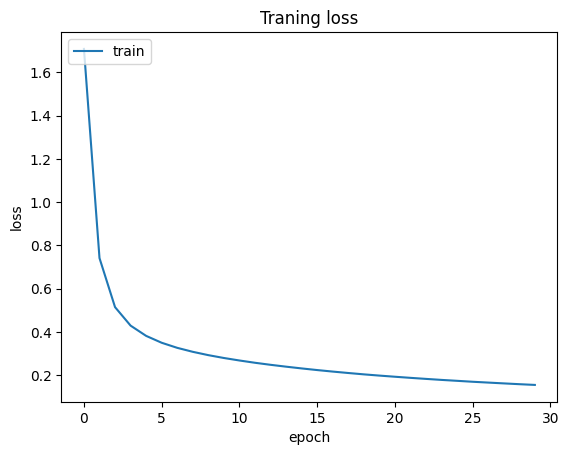

In [35]:
plt.plot(History.history['loss'])
plt.title('Traning loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## **Testing The Model**

In [29]:
# Import the necessary libraries
from sklearn.metrics import accuracy_score


# Predict probabilities for the test set using the trained model
y_pred_probs1 = model.predict(x_test, verbose=0)

y_pred = np.where(y_pred_probs1 > 0.5, 1, 0)

# Calculate and print the test accuracy using predicted and true labels
test_accuracy = accuracy_score(y_pred, y_test)
print("\nTest accuracy: {}".format(test_accuracy))


Test accuracy: 0.945


## **Now Display the Prdiction**

In [30]:
# Define a mask for selecting a range of indices (20 to 49)
mask = range(20, 50)

# Select the first 20 samples from the test set for visualization
X_valid = x_test[0:20]
actual_labels = y_test[0:20]

# Predict probabilities for the selected validation samples
y_pred_probs_valid = model.predict(X_valid)
y_pred_valid = np.where(y_pred_probs_valid > 0.5, 1, 0)


1/1 [==============================] - 0s 25ms/step


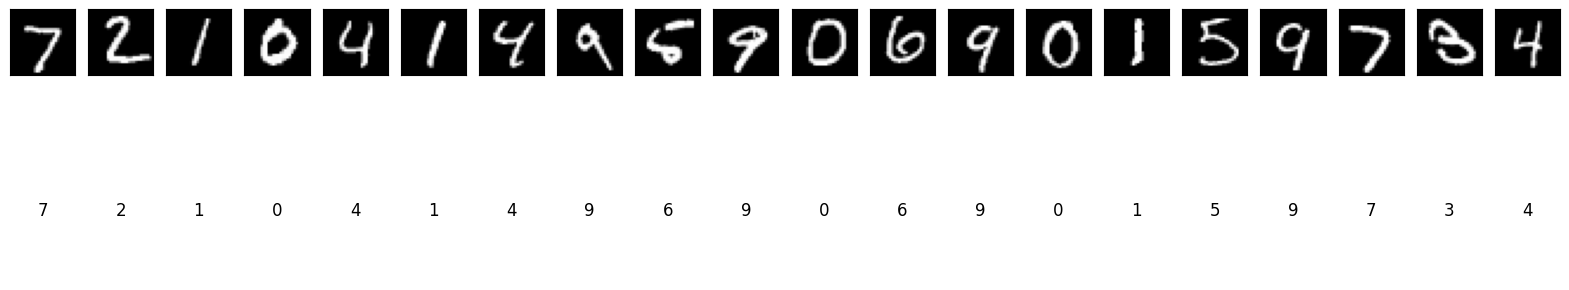

In [31]:
# Set up a figure to display images
n = len(X_valid)
plt.figure(figsize=(20, 4))

for i in range(n):
    # Display the original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_valid[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display the predicted digit
    predicted_digit = np.argmax(y_pred_probs_valid[i])
    ax = plt.subplot(2, n, i + 1 + n)
    plt.text(0.5, 0.5, str(predicted_digit), fontsize=12, ha='center', va='center')
    plt.axis('off')

# Show the plotted images
plt.show()

# Close the plot
plt.close()